# Importing Dependecy

In [3]:
!pip freeze > requirements.txt

!pip install tensorflow==2.10.0
!pip install tensorflow-gpu==2.10.0
!pip install matplotlib
!pip install opencv-python

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy



ModuleNotFoundError: No module named 'tensorflow'

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


pipenv                             2023.11.15
pkginfo                            1.7.1
platformdirs                       4.1.0
pluggy                             0.13.1
ply                                3.11
poyo                               0.5.0
prometheus-client                  0.11.0
prompt-toolkit                     3.0.20
psutil                             5.8.0
ptyprocess                         0.7.0
py                                 1.10.0
pycodestyle                        2.7.0
pycosat                            0.6.3
pycparser                          2.20
pycurl                             7.44.1
pydocstyle                         6.1.1
pyerfa                             2.0.0
pyflakes                           2.3.1
Pygments                           2.10.0
PyJWT                              2.4.0
pylint                             2.9.6
pyls-spyder                        0.4.0
PyNaCl                             1.4.0
pyodbc                             4.0.0-unsuppo

# Loading data

In [4]:
#creating a variable for data directory
data_dir = 'data'

In [5]:
#List of extensions that we want in our data set
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
#iterating through all the data set just in case there is non readable file
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) #is it readable
            tip = imghdr.what(image_path) #does it belong to required img type
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
#creating a data set using keras 
data = tf.keras.utils.image_dataset_from_directory('data')

Found 22564 files belonging to 2 classes.


In [8]:
#following variable will allow us to access the data set
data_iterator = data.as_numpy_iterator()

In [9]:
#Accessing the data in form of batches
batch = data_iterator.next()

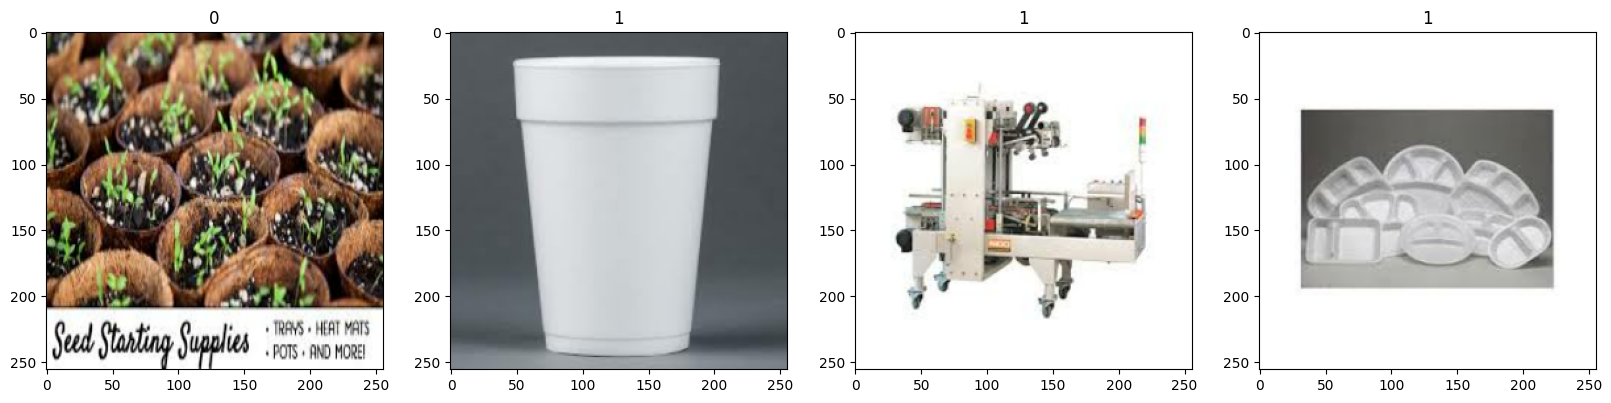

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



# Preprocessing

In [11]:
#heighest value of image pixel
batch[0].max()

255.0

In [12]:
len(batch)
#first row store images
#second rowe store labels

2

In [13]:
data = data.map(lambda x,y: (x/255,y))
# x = images
# y = labels

In [14]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model

In [16]:
model =0
model = Sequential()

In [17]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])



In [19]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [20]:
logdir='logs'

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist = 0

In [23]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
495/495 [==============================] - 62s 121ms/step - loss: 0.5096 - accuracy: 0.7732 - val_loss: 0.4609 - val_accuracy: 0.7939
Epoch 2/3
495/495 [==============================] - 64s 130ms/step - loss: 0.4139 - accuracy: 0.8229 - val_loss: 0.3811 - val_accuracy: 0.8364
Epoch 3/3
495/495 [==============================] - 64s 130ms/step - loss: 0.3649 - accuracy: 0.8432 - val_loss: 0.3750 - val_accuracy: 0.8442


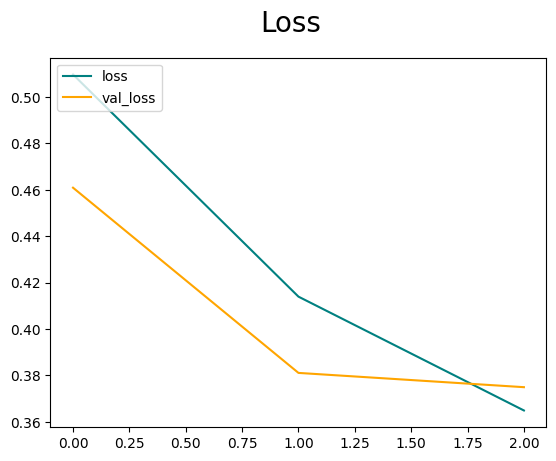

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

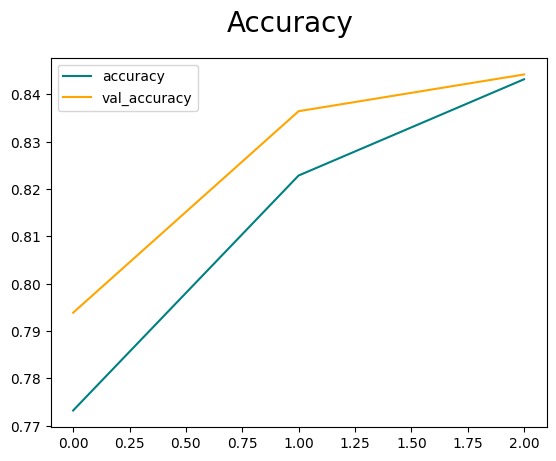

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 144ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7746341, shape=(), dtype=float32) tf.Tensor(0.79162514, shape=(), dtype=float32) tf.Tensor(0.801085, shape=(), dtype=float32)


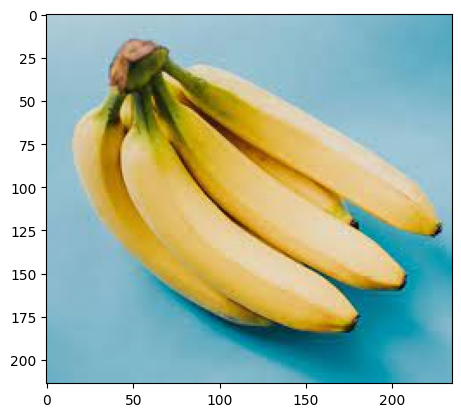

In [28]:
img = cv2.imread('test3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

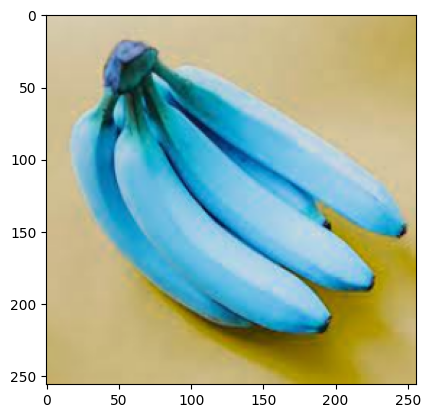

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 145ms/step


In [31]:
yhat

array([[0.97302365]], dtype=float32)